In [8]:
%matplotlib inline
import pyspeckit
import numpy as np
from astropy import units as u
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.convolution import convolve, Box1DKernel
from c_normalize import c_normalize


## Basic Plotting and Fitting

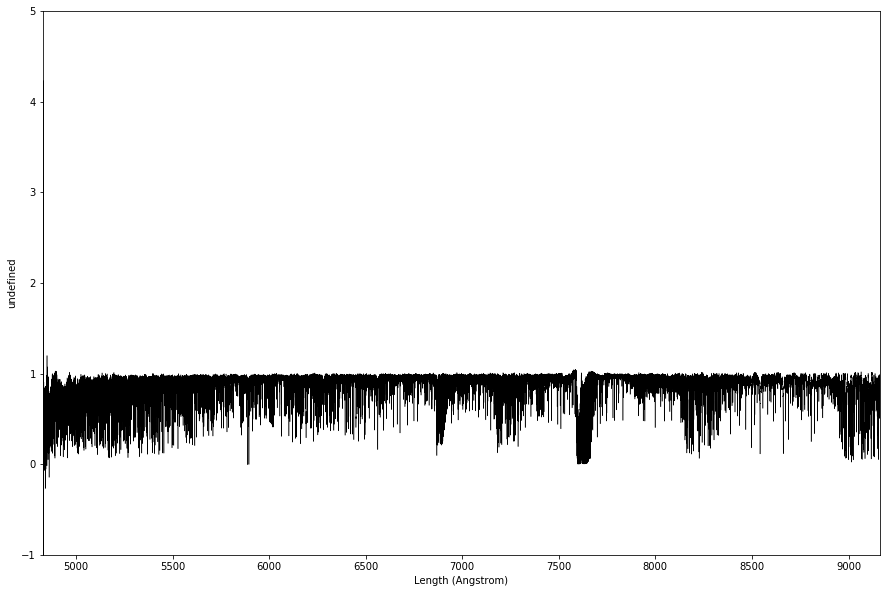

In [2]:
s_hdu = fits.open("Data/ew_known/tame_inputs/col110_1134red_oned_25jan14_wavsoln.fits")
fig = plt.figure(figsize=(15,10))

s_data = s_hdu[1].data
s_flux = s_data['FLUX']
s_wav = s_data['WAVEL'] * u.AA
sp = pyspeckit.Spectrum(data=s_flux, xarr=s_wav)
sp.plotter(figure=fig, ymin = -1, ymax = 5)

In [3]:
#s_hdu[0].header

[ 0.66666669  1.          0.68230957 ...,  0.26774517  0.26264656
  0.17260873]


-2.07380749287


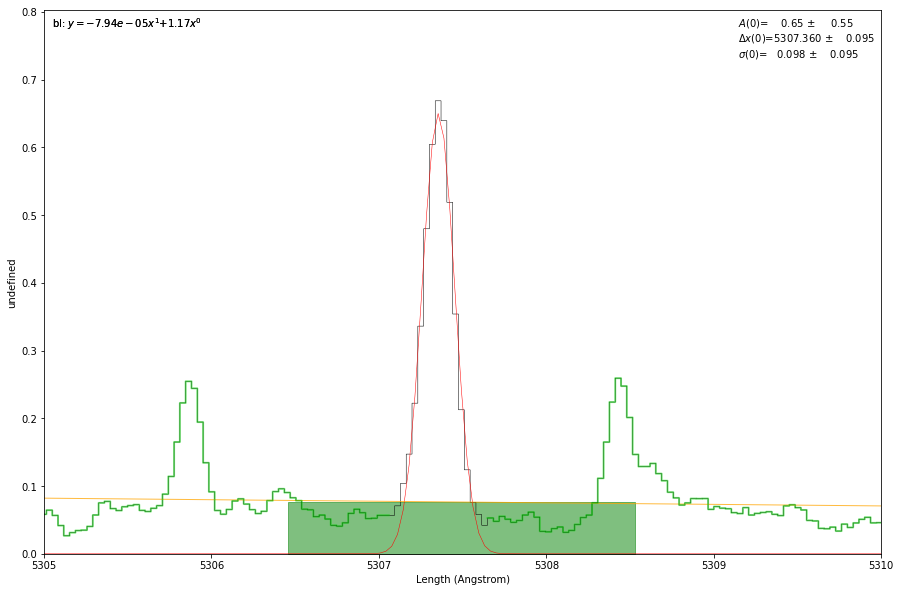

In [4]:
s_hdu = fits.open("Data/ew_known/tame_inputs/col110_1134red_oned_25jan14_wavsoln.fits")
#spec_lpx = pd.read_csv("Data/ew_known/tame_inputs/col110_1134red_oned_25jan14.lpx",
                       #delim_whitespace = True, header=None)
fig = plt.figure(figsize=(15,10))

s_data = s_hdu[1].data
s_flux = abs(s_data['FLUX'] - 1.)

smoothed_flux = convolve(s_flux, Box1DKernel(3))
s_flux = smoothed_flux
#s_flux = s_data['FLUX']*np.array(spec_lpx[1])
print(s_flux)
s_wav = s_data['WAVEL'] * u.AA
sp = pyspeckit.Spectrum(data=s_flux, xarr=s_wav)
sp.plotter(figure = fig, xmin=5305, xmax=5310., ymin = 0)

sp.specfit(fittype='gaussian', guesses = [0.5, 5307.36, 0.1])
#sp.specfit(fittype='voigt', guesses = 'moments')
sp.baseline(subtract=False, highlight_fitregion=True, excludefit = True)
print(sp.specfit.EQW(plot=True, continuum_as_baseline=True))

sp.plotter.savefig('basic_plot_example_withfit.png')

EQW: 137.58585449560962 mA


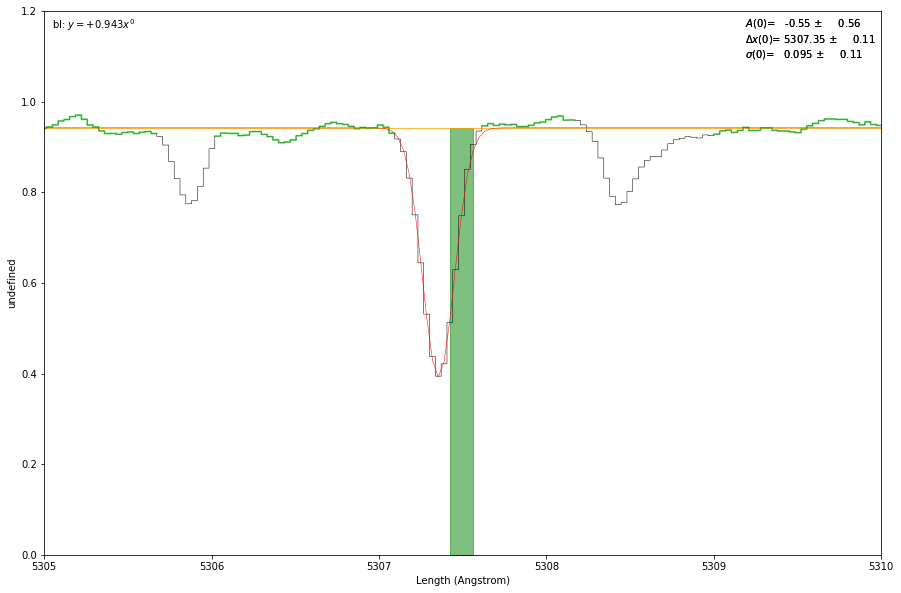

In [38]:
s_hdu = fits.open("Data/ew_known/tame_inputs/col110_1134red_oned_25jan14_wavsoln.fits")
#s_hdu = fits.open("Data/ew_known/tame_inputs/ngc6583_50red_oned_slit07_jun14_wavsoln.fits")
fig = plt.figure(figsize=(15,10))

s_data = s_hdu[1].data
s_flux = s_data['FLUX']
smoothed_flux = convolve(s_flux, Box1DKernel(5))
s_flux = smoothed_flux
s_wav = s_data['WAVEL'] * u.AA
sp = pyspeckit.Spectrum(data=s_flux, xarr=s_wav)
sp.plotter(figure = fig, xmin=5305, xmax=5310., ymin=0, ymax=1.2)

sp.baseline(order=0, subtract=False, highlight_fitregion=True, exclude=[5305.7,5306,5307.1,5307.6,5308.2,5309])
            
sp.specfit(fittype='gaussian', guesses = [0.1, 5307.36, 0.1])
EQW = sp.specfit.EQW(plot=True, continuum = 0.95)
print("EQW:", EQW*1000*u.mA)

sp.plotter.savefig('basic_plot_example_withfit.png')



## Try c_normalize

The fit may be poorly conditioned


EQW: 90.62173448069188 mA


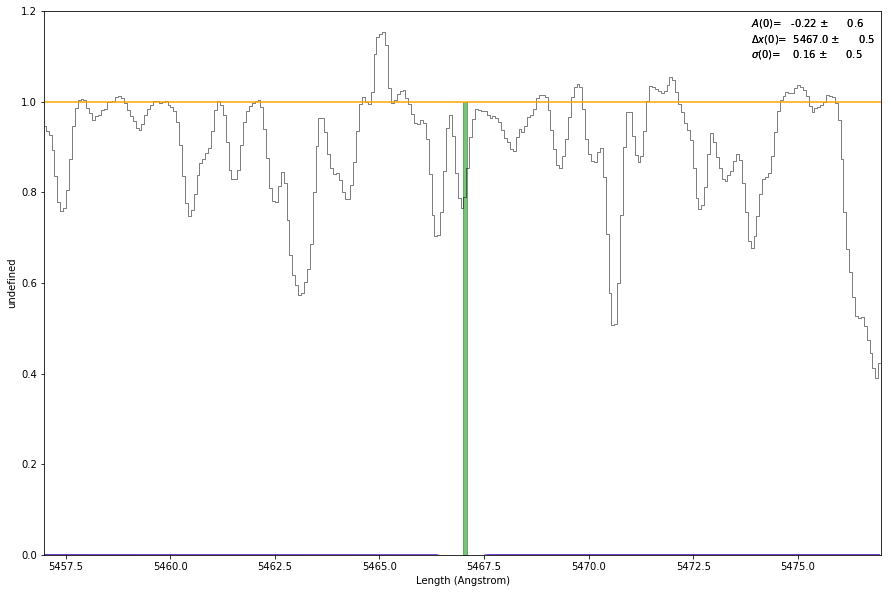

In [142]:
s_hdu = fits.open("data/ew_known/tame_inputs/ngc6583_42red_oned_slit07_jun14_wavsoln.fits")
#s_hdu = fits.open("Data/ew_known/tame_inputs/ngc6583_50red_oned_slit07_jun14_wavsoln.fits")
fig = plt.figure(figsize=(15,10))

line_cen = 5466.99
width = 10
lim_l = line_cen - width
lim_r = line_cen + width


s_data = s_hdu[1].data
s_flux = s_data['FLUX']
smoothed_flux = convolve(s_flux, Box1DKernel(5))
s_flux = smoothed_flux
s_wav = s_data['WAVEL']

wav_mask = (s_wav > lim_l) & (s_wav < lim_r)
s_flux = s_flux[wav_mask]
s_wav = s_wav[wav_mask]
yfit, norm, pts = c_normalize(s_flux, s_wav, median_replace=False, cheby=True, low_cut = 0.7)

sp = pyspeckit.Spectrum(data=norm, xarr=s_wav * u.AA)
sp.plotter(figure = fig, xmin=lim_l, xmax=lim_r, ymin=0, ymax=1.2)

#Get around pyspeckits reliance on a generated baseline and just generate basespec as a ones array (continuum is always one in normalized case)
#sp.baseline(order=0, subtract=False, highlight_fitregion=False)
sp.baseline.basespec = np.ones(len(s_wav))
sp.specfit(fittype='gaussian', guesses = [10, line_cen, 0.5], exclude= [0,5466.5, 5467.5, 5500], show_components=True)
EQW = sp.specfit.EQW(plot=True, continuum = 1.0, continuum_as_baseline=False)
print("EQW:", EQW*1000*u.mA)
plt.axhline(1, color = 'orange')
#plt.plot(s_wav, yfit)
#sp.plotter.savefig('basic_plot_example_withfit.png')

The fit may be poorly conditioned


EQW: 12.237484931564714 mA


(0.01, 1.2)

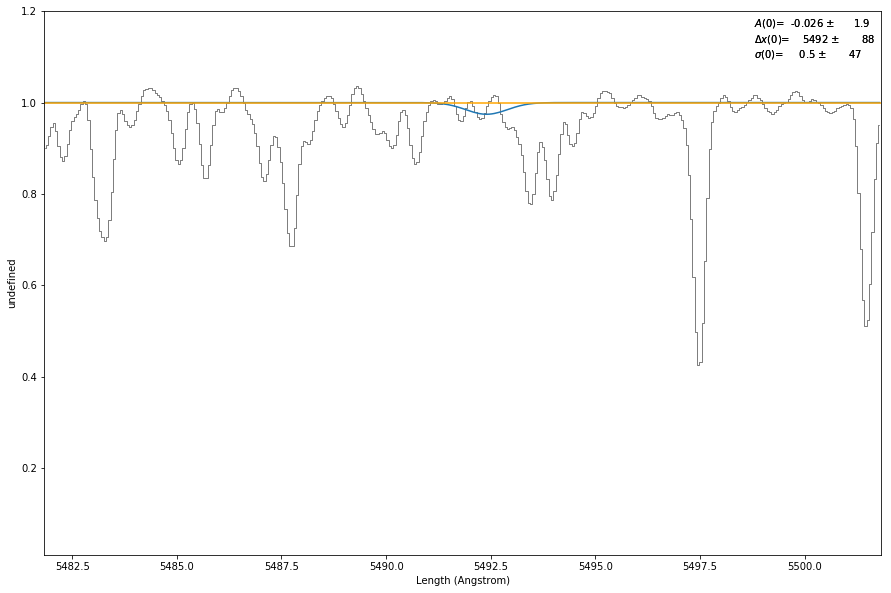

In [188]:
s_hdu = fits.open("data/ew_known/tame_inputs/ngc2204_4223red_oned_05jan14_wavsoln.fits")
#s_hdu = fits.open("Data/ew_known/tame_inputs/ngc6583_50red_oned_slit07_jun14_wavsoln.fits")
fig = plt.figure(figsize=(15,10))

line_cen = 5491.83
width = 10
lim_l = line_cen - width
lim_r = line_cen + width


s_data = s_hdu[1].data
s_flux = s_data['FLUX']
smoothed_flux = convolve(s_flux, Box1DKernel(5))
s_flux = smoothed_flux
s_wav = s_data['WAVEL']

wav_mask = (s_wav > lim_l) & (s_wav < lim_r)
s_flux = s_flux[wav_mask]
s_wav = s_wav[wav_mask]
yfit, norm, pts = c_normalize(s_flux, s_wav, median_replace=False, cheby=True, low_cut = 0.85)

sp = pyspeckit.Spectrum(data=norm, xarr=s_wav * u.AA)
sp.plotter(figure = fig, xmin=lim_l, xmax=lim_r, ymin=0, ymax=1.2)

#Get around pyspeckits reliance on a generated baseline and just generate basespec as a ones array (continuum is always one in normalized case)
#sp.baseline(order=0, subtract=False, highlight_fitregion=False)
sp.baseline.basespec = np.ones(len(s_wav))

sp.specfit(fittype='gaussian', guesses = [1, line_cen, 0.5], exclude= [0,line_cen-0.5, line_cen+0.5, line_cen+5000])
model = sp.specfit.get_model_frompars(s_wav, sp.specfit.parinfo)
plt.plot(s_wav,model + 1)

EQW = sp.specfit.EQW(plot=False, continuum = 1.0, continuum_as_baseline=False)
print("EQW:", EQW*1000*u.mA)
plt.axhline(1, color = 'orange')
plt.ylim([0.01, 1.2])
#plt.plot(s_wav, yfit)
#sp.plotter.savefig('basic_plot_example_withfit.png')